<a href="https://colab.research.google.com/github/sohelkhan973/test-demo/blob/master/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import pprint

In [7]:

path = untar_data(URLs.PETS)

In [8]:
path.ls()                           

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_ano = path/'annotations'                                                        

In [0]:
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)

In [14]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_121.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_70.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_53.jpg')]

In [0]:
np.random.seed(44)
pat = r'/([^/]+)_\d+.jpg'

In [16]:
print(pat)

/([^/]+)_\d+.jpg


In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224 , bs = 64
                                  ).normalize(imagenet_stats)

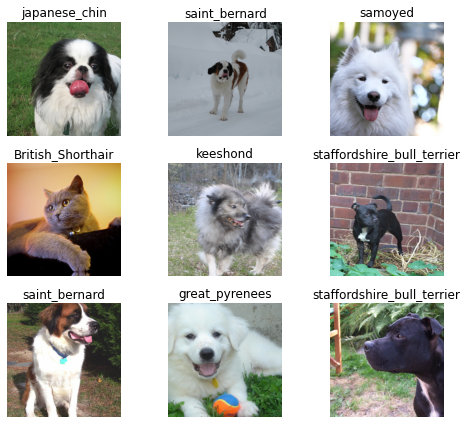

In [18]:
data.show_batch(rows=3,figsize = (7,6))

In [19]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [20]:
learn = cnn_learner(data , models.resnet34 , pretrained=True , metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


# **Predict the breed**

In [0]:

def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

In [0]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [0]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/5/52/British_Shorthair_black-silver_tabby_mackerel_2_%28original%29.JPG"

[('Bombay', 0.18257586658000946),
 ('Russian_Blue', 0.0708986446261406),
 ('Abyssinian', 0.06506041437387466),
 ('basset_hound', 0.06209660694003105),
 ('japanese_chin', 0.05613786727190018)]


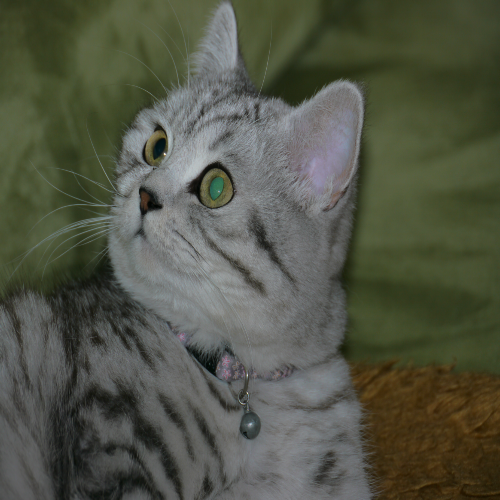

In [27]:
predict(img_url)


download the stage-2.pth model which can be found under

# content/data/oxford-iiit-pet/images/models/stage-2.pth
to your local machine and you can use this to build webapp